<div style='text-align: center;'>
<h1>Digital Biomarker Discovery for Eye Disorders using EEG Data</h1>
<p><center>Prepared by Kui Hong Lim<br>
Email: kuihong.lim@students.fhwn.ch<br>
<a href = "https://github.com/CharleneLimKH/EEG.git)">Github</a><br>
Date : April 2024<br>
Module : Digital Biomarker<br>
Master of Informatics<br>
University of Applied Sciences and Arts Northwestern Switzerland</center></p>
</div>

***

<h2>Objective</h2>
<p>The objective of this project is to develop a digital biomarker using EEG data that can accurately identify individuals with eye disorders characterized by the need for long and stronger blinks. Students will analyze EEG signals obtained from four electrodes to find a biomarker that can be used to diagnose this eye disorder efficiently.</p>

<h2>Project Tasks</h2>

<style>
table {float:left}
</style>

| Index      | Task |
| ----------- | ----------- |
| 1   | Data download and Preprocessing      |
| 2   | Feature Extraction        |
| 3   | Biomarker Selection and Visualization|
| 4   | Model Development, Validation and Evaluation |



**1. Data download and preprocessing**

1.1 Data cleaning and understanding

Reading the EEG data from the provided four electrodes by running the file collected during the long blink and short blink session with equal length (510 points pro session). Conduct the preliminary data processing and visualization steps to gain some insight from the EEG recording, started with the long blink data:
- Split and clean the data

1.2 Load data, and parsing it from string to appropriate data type. Then, apply moving average filter  for visualization.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal 
from scipy.signal import lfilter

%matplotlib inline


In [2]:
# Long blink data
#df1 = pd.read_csv('/LongBlink_test.csv', sep = ",") -#google colab
df1 = pd.read_csv('data\\LongBlink_test.csv', sep = ",")
df1[['Col1', 'Col2', 'Col3', 'Col4']] = df1['data'].str.split(',', expand=True) 
# Remove the original 'HeaderColumn' column
df1.drop(columns=['data'], inplace=True)
df1.head(5)
ser1 = df1.iloc[:,0].str.strip('[').astype(float) #to remove square brackets and convert to float
ser2 = df1.iloc[:,1].astype(float) #convert to float
ser3 = df1.iloc[:,2].astype(float) #convert to float
ser4 = df1.iloc[:,3].str.strip(']').astype(float) #remove square brackets and convert to float
# ser 1,2,3,4 are numpy arrays, length: 25500, dtype: float64
df1 = pd.concat([ser1, ser2, ser3, ser4], axis=1) #concatenate the columns
df1.columns = ['ser1', 'ser2', 'ser3', 'ser4'] #rename the columns
# Extract the first 510 points of the data as sample and visualize it
# df1_sample = df1.iloc[510:1020] 
# df1_sample.plot.line(subplots=True, figsize=(20, 20))
# plt.xlabel('No. of points')
# plt.ylabel('Amplitude')
# plt.title('The initial 510 to 1020 data points of the long blink segment')


Creating RawArray with float64 data, n_channels=4, n_times=25500
    Range : 0 ... 25499 =      0.000 ...   118.600 secs
Ready.
Overwriting existing file.
Writing d:\python\eeg_filtering\EEG\data\raw_lb.fif


C:\Users\saubo\AppData\Local\Temp\ipykernel_15724\2449599804.py:22: RuntimeWarning: This filename (d:\python\eeg_filtering\EEG\data\raw_lb.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_lb.save('.\\data\\raw_lb.fif', overwrite=True)


Closing d:\python\eeg_filtering\EEG\data\raw_lb.fif
[done]
Effective window size : 9.526 (s)


d:\python\eeg_filtering\.venv\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\saubo\AppData\Local\Temp\ipykernel_15724\2449599804.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  raw_lb.compute_psd().plot(average=True, picks="data", exclude="bads").show()


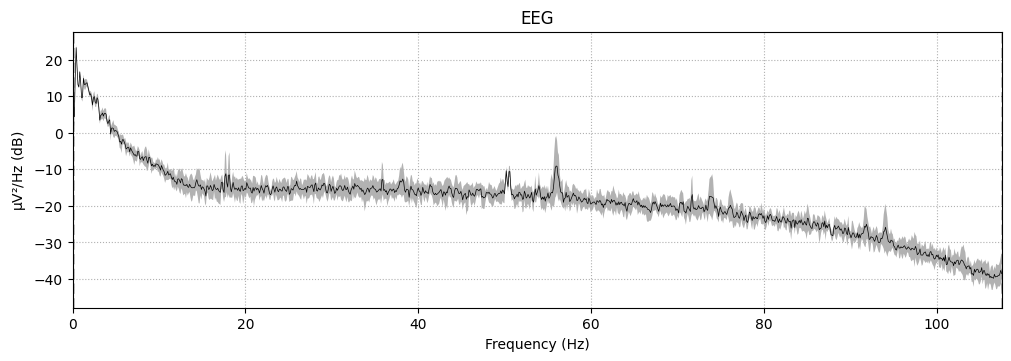

In [3]:
#!pip install mne #google colab
import mne
from sklearn.preprocessing import MinMaxScaler

n_channels = len(df1.columns) #define number of channels
#print(n_channels)
ch_names = list(df1) #list of channel names
#print(ch_names)

#Min-max scaling
scaler = MinMaxScaler(feature_range=(0.000020,0.000100)) #scale the data to the range of 20 to 100 uV
df_scaled = scaler.fit_transform(df1.to_numpy()) 
df1_norm = pd.DataFrame(df_scaled, columns=df1.columns)
#print(df1_norm.head(5))
values = df1_norm.T # transpose the dataframe
#print(values)
ch_types = ['eeg']*df1.shape[1]
sampling_freq = 215 

info = mne.create_info(ch_names=ch_names, sfreq=sampling_freq, ch_types=ch_types)
raw_lb = mne.io.RawArray(values, info)
raw_lb.save('.\\data\\raw_lb.fif', overwrite=True)
raw_lb.compute_psd().plot(average=True, picks="data", exclude="bads").show()

There is no significant disturbance

In [4]:
# Get pandas dataframe from raw format
lb_data = raw_lb.to_data_frame()
#print(lb_data)
lb_data = lb_data.drop("time", axis=1) #drop "time" column

# Get pandas series to use in data preprocessing
ser1 = lb_data["ser1"]
ser2 = lb_data["ser2"]
ser3 = lb_data["ser3"]
ser4 = lb_data["ser4"]
#print(type(ser1))
lb_data

,ser1,ser2,ser3,ser4
0,56.176773,68.333333,52.64,57.438424
1,56.423433,69.333333,49.92,56.965517
2,56.916752,67.333333,48.16,57.990148
3,55.847893,65.333333,53.28,59.487685
4,54.696814,66.000000,53.28,58.778325
...,...,...,...,...
25495,56.176773,67.666667,52.00,58.147783
25496,56.423433,68.333333,50.72,58.463054
25497,56.916752,68.666667,51.36,57.201970
25498,57.492292,68.333333,53.44,57.280788


In [5]:
# lb_data = pd.read_csv('data/new_LongBlink_test.csv')
# #lb_data.head()
# lb_nparray = lb_data.T.to_numpy() # convert from DataFrame to numpy and transpose for further processing
# x = lb_nparray[0]
# #x.shape
# #data info
# FS = 215 # sampling rate [Hz] of recorded signal
# K = np.arange(x.shape[0]) # create time index vector  # number of samples to process. Here: fs*<number of seconds>
# #K

In [6]:
# --- Cell (2) - Applying Moving Average Filter of Length L to the input signal x "Create a function for this below"

# L = 3   # filter length (tab size)

# # moving average filter coefficients
# h = np.ones(L)/L # or [1/L] / L         # moving averag filter, impulse response
# y = lfilter(h, [1], x)                  # apply the convolution ( h * y )

# y_ = np.roll(y, shift= -int(L/2))         # output signal without shift

# # -------------------------------------------------------
# print(h)
# print(x[0:5])
# print(y[0:5])


In [7]:
# --- Cell (3) - Plotting filter results

# blink number to plot
# blink_num = 1

# plot_start = (FS*2) *0
# # plot_end = 25500
# plot_end = plot_start + FS*2


# fig, axs = plt.subplots(1, 1, sharex='all', sharey='all', figsize=(12, 3))
# fig.tight_layout()
# axs.plot(K[plot_start:plot_end], x[plot_start:plot_end], lw=1.0, color='gray', label="x (raw ECG)")
# axs.plot(K[plot_start:plot_end], y[plot_start:plot_end], lw=1.0, ls='--', color='blue', label="y (MA)")
# axs.plot(K[plot_start:plot_end], y_[plot_start:plot_end], lw=1.0, ls='-', color='blue', label="y (MA, shifted)")
# axs.set_title("Moving Average Filter (L="+str(L)+")")

# axs.legend()
# plt.show()

**1. Data download and preprocessing**

1.3 




In [8]:
# Define the slice to display in the following code. Just change the value of 'SLICE_FROM' with 0 or a multiple of 510
SLICE_FROM = 510
SLICE_TO = SLICE_FROM + 510

# Create moving average filter function
def moving_average_filter(data: np.ndarray, L: int) -> np.ndarray:
    h = np.ones(L)/L
    y = lfilter(h, [1], data)
    y_ = np.roll(y, shift= -int(L/2))
    return y_

# Create a butterworth bandpass filter function
# source: https://scipy-cookbook.readthedocs.io/items/ButterworthBandpass.html
def butter_bandpass(lowcut, highcut, fs, order=4) -> tuple:
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data: pd.Series, lowcut: float, highcut: float, fs: float, order=4) -> np.ndarray:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y


In [58]:
# Create a preprocessing function

def preprocessing(data: pd.DataFrame, slice_from: int, slice_to: int) -> pd.DataFrame:
    # Define moving average filter parameters
    L = 12

    # Define butter bandpass filter parameters
    lowpass = 20
    highpass = None # Nyquist frequency is half of the sampling rate of 215 Hz
    fs = 215
    order = 4
    
    # Define notch filter parameters
    notch_freq = 60
    Q = 20.0  # Quality factor


    # Create an empty pandas DataFrame
    cleaned_data = pd.DataFrame()

    # Loop through all columns and apply the filters
    for key, value in data.items():

        # converting the data to numpy series
        series_raw = value.to_numpy()

        # for each column plot all the filters results
        fig, ax0 = plt.subplots(1, 1, figsize=(15,5)) # 4 rows, 1 column


        # # apply notch filter
        # b, a = signal.iirnotch(w0=notch_freq, Q=Q, fs=fs)
        # series_nf = signal.lfilter(b, a, value)
        

        # apply moving_average_filter
        series_maf = moving_average_filter(series_raw, L)

        # apply butter bandpass filter
        b, a = signal.iirfilter(order, [lowpass,], fs=fs, ftype='butter', btype='lowpass')
        series_bbf = signal.filtfilt(b, a, series_maf)

        # applay FIR filter
        cutoff_freq = [0.01, 0.06] #Hz
        firwin_filter = signal.firwin(430, cutoff_freq, pass_zero=False)
        series_firwin = signal.convolve(value, firwin_filter, mode='same')


        cleaned_data[key] = series_firwin


        # plot each steps ax0 raw value, ax1 after butter bandpass, ax2 after median, ax3 after notch filter.
        ax0.set_title('Data')
        ax0.set_xlabel('Data Point')
        ax0.set_ylabel('Amplitude (\u03BCV)')

        plot_row, = ax0.plot(series_raw[slice_from:slice_to], color="grey", label='raw data')
        

        plot_ma, = ax0.plot(series_maf[slice_from:slice_to], color="blue", label='moving average')


        plot_butter, = ax0.plot(series_bbf[slice_from:slice_to], color="red", label='butter')


        plot_firwin, = ax0.plot(series_firwin[slice_from:slice_to], color="orange", label='firwin')


        ax0.legend(handles=[plot_row, plot_ma, plot_butter, plot_firwin])


        
        fig.suptitle(f"Filters apply to '{key}'")

    return cleaned_data

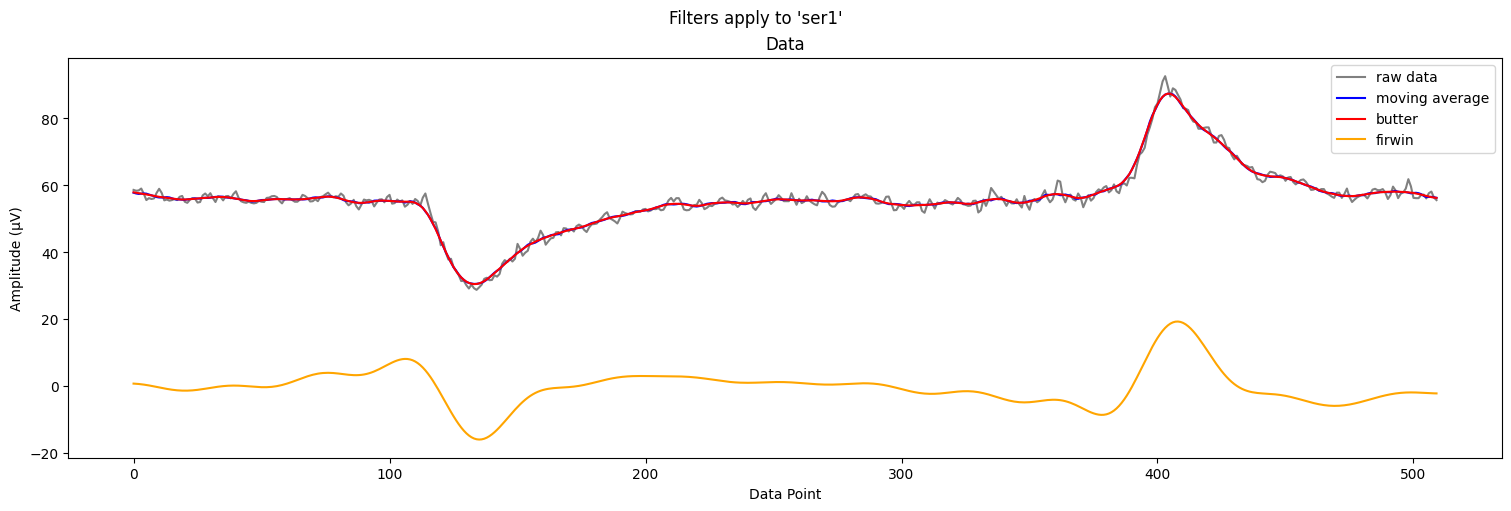

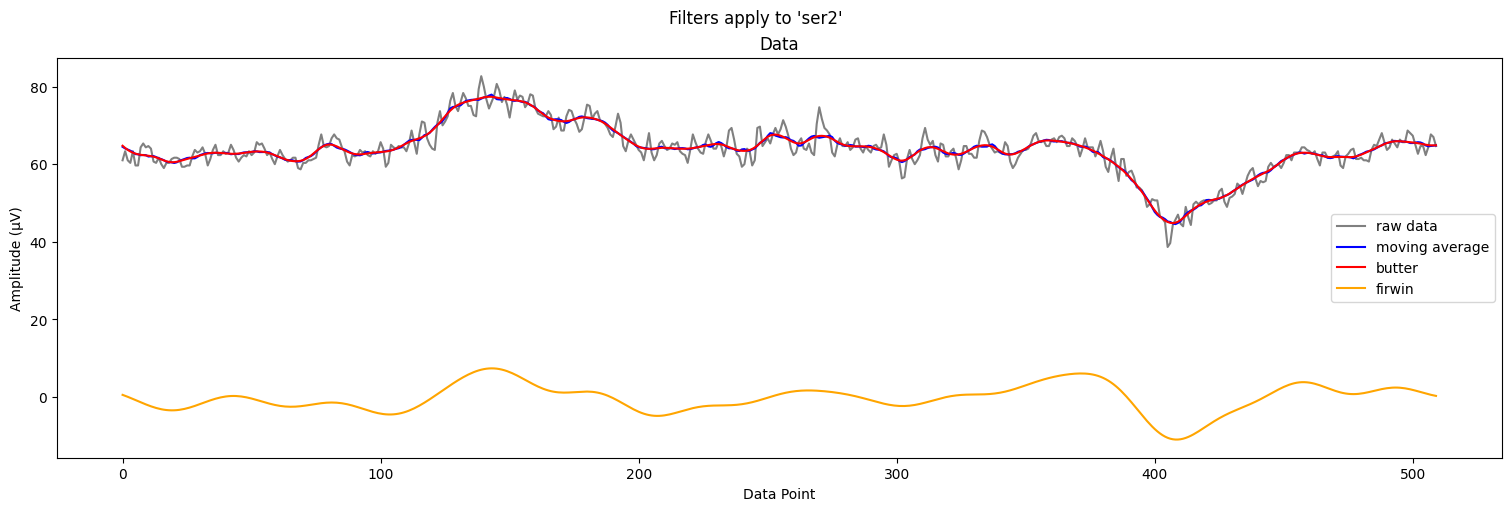

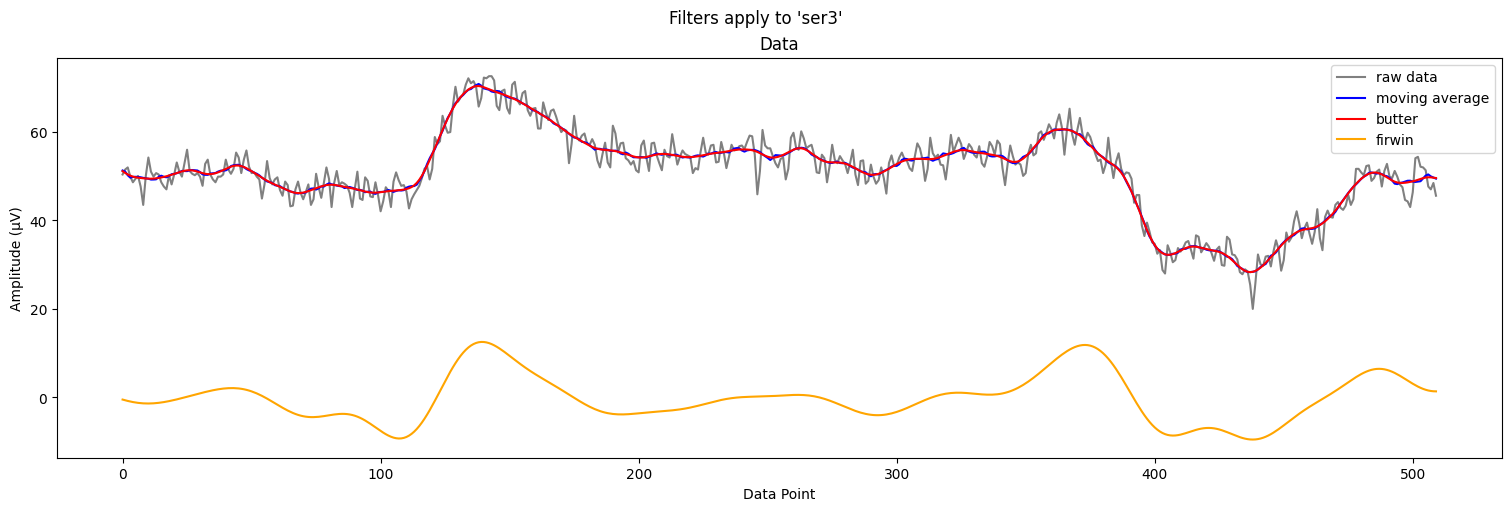

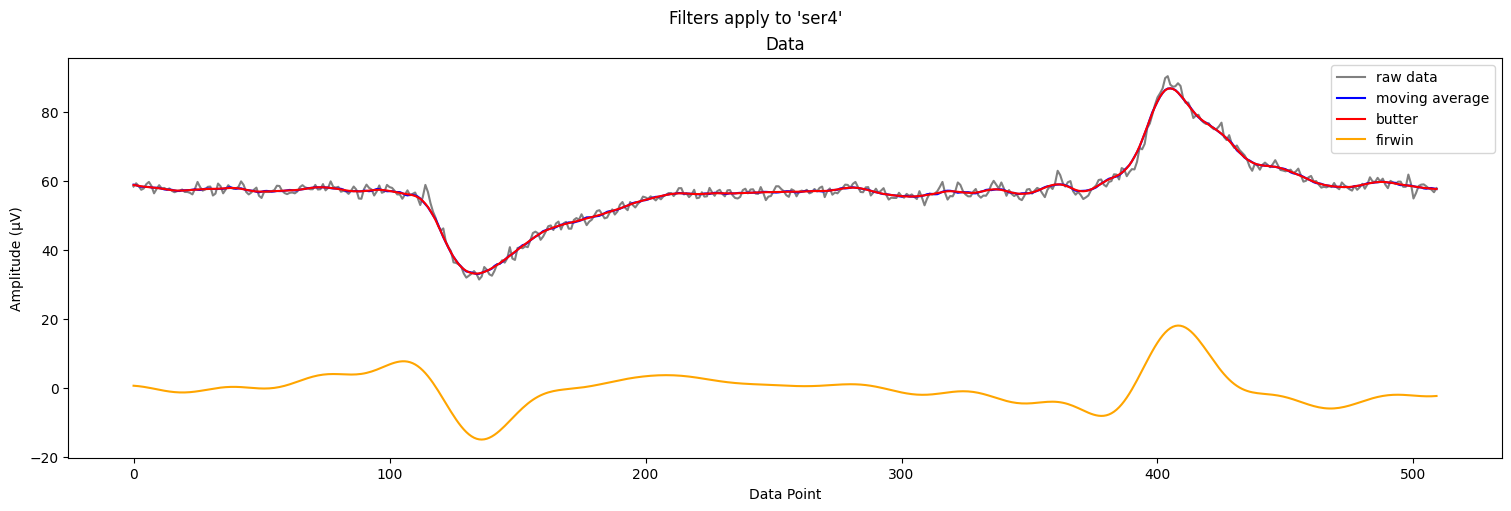

In [59]:
# lb_cleaned = preprocessing(lb_data, SLICE_FROM, SLICE_TO)
lb_filtered = preprocessing(lb_data, SLICE_FROM, SLICE_TO)


**1. Data download and preprocessing**

1.8 Data preprocessing and filtering on short blink data

The same steps to process and filter long blink data are applied on the short blink data. In contrast to the long blink data, the short blink data exhibits reduced power line noise. However, it is affected by artifacts and noises within the amplitude range of 600 Hz to 900 Hz. Many small fluctuations are noticed before the rise or descent to the peak at 60 seconds (an indication of eye blink). The Power Spectral Density (PSD) analysis indicates a gradual increase in noise from 10 Hz towards the end of the segment, featuring a distinct peak at around 56 Hz.

In [11]:
# Short blink data
df2 = pd.read_csv('data\\ShortBlink_test.csv', sep = ",")
df2[['Col1', 'Col2', 'Col3', 'Col4']] = df2['data'].str.split(',', expand=True)
# Remove the original 'HeaderColumn' column
df2.drop(columns=['data'], inplace=True)
df2.head(5)
ser1 = df2.iloc[:,0].str.strip('[').astype(float) #to remove square brackets and convert to float
ser2 = df2.iloc[:,1].astype(float) #convert to float
ser3 = df2.iloc[:,2].astype(float) #convert to float
ser4 = df2.iloc[:,3].str.strip(']').astype(float) #remove square brackets and convert to float
# ser 1,2,3,4 are numpy arrays, length: 25500, dtype: float64
df2 = pd.concat([ser1, ser2, ser3, ser4], axis=1) #concatenate the columns
df2.columns = ['ser1', 'ser2', 'ser3', 'ser4'] #rename the columns
# Extract the first 510 points of the data as sample and visualize it
# df2_sample = df2.iloc[510:1020] 
# df2_sample.plot(subplots=True, figsize=(20, 20))
# plt.xlabel('No. of points')
# plt.ylabel('Amplitude')
# plt.title('The initial 510 to 1020 points of short blink segment')
# #print(sb_ser1[0])

Creating RawArray with float64 data, n_channels=4, n_times=25500
    Range : 0 ... 25499 =      0.000 ...   118.600 secs
Ready.
Overwriting existing file.
Writing d:\python\eeg_filtering\EEG\data\raw_sb.fif
Closing d:\python\eeg_filtering\EEG\data\raw_sb.fif
[done]
Effective window size : 9.526 (s)


C:\Users\saubo\AppData\Local\Temp\ipykernel_15724\704302784.py:13: RuntimeWarning: This filename (d:\python\eeg_filtering\EEG\data\raw_sb.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_sb.save('.\\data\\raw_sb.fif', overwrite=True)
d:\python\eeg_filtering\.venv\lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\saubo\AppData\Local\Temp\ipykernel_15724\704302784.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  raw_sb.compute_psd().plot(average=True, picks="data", exclude="bads").show()


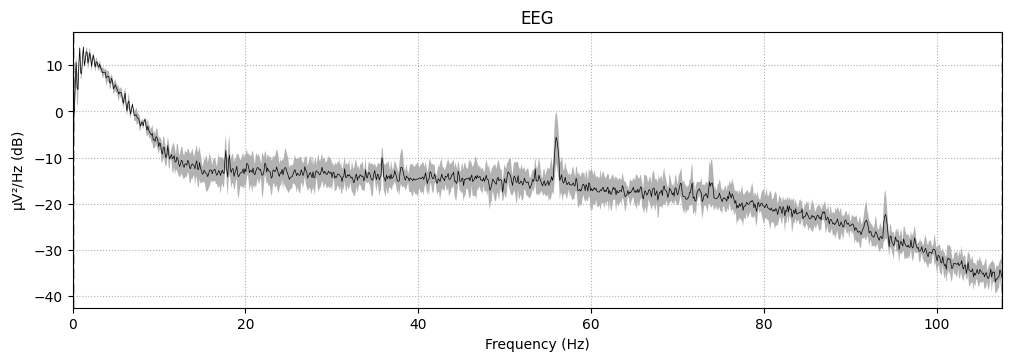

In [12]:
#Min-max scaling
scaler = MinMaxScaler(feature_range=(0.000020,0.000100)) #scale the data to the range of 20 to 100 uV
df_scaled = scaler.fit_transform(df2.to_numpy()) 
df2_norm = pd.DataFrame(df_scaled, columns=df2.columns)
#print(df1_norm.head(5))
values = df2_norm.T # transpose the dataframe
#print(values)
ch_types = ['eeg']*df2.shape[1]
sampling_freq = 215 

info = mne.create_info(ch_names=ch_names, sfreq=sampling_freq, ch_types=ch_types)
raw_sb = mne.io.RawArray(values, info)
raw_sb.save('.\\data\\raw_sb.fif', overwrite=True)
raw_sb.compute_psd().plot(average=True, picks="data", exclude="bads").show()

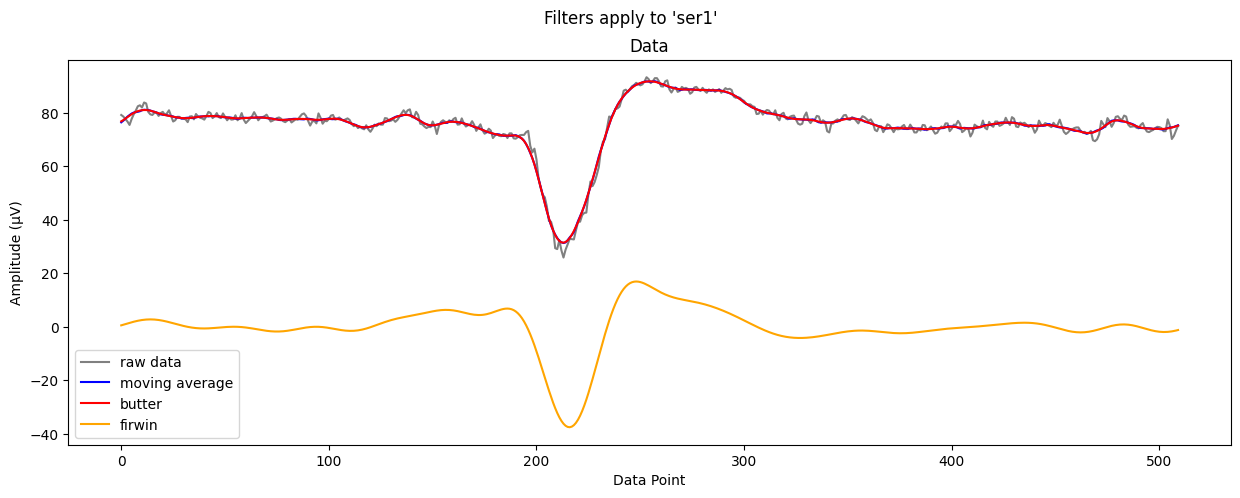

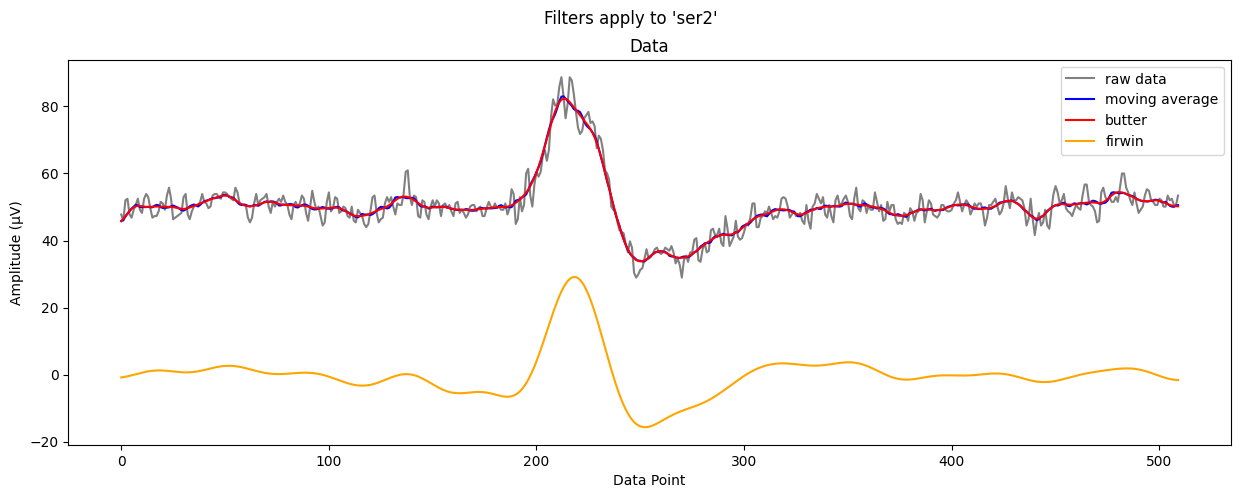

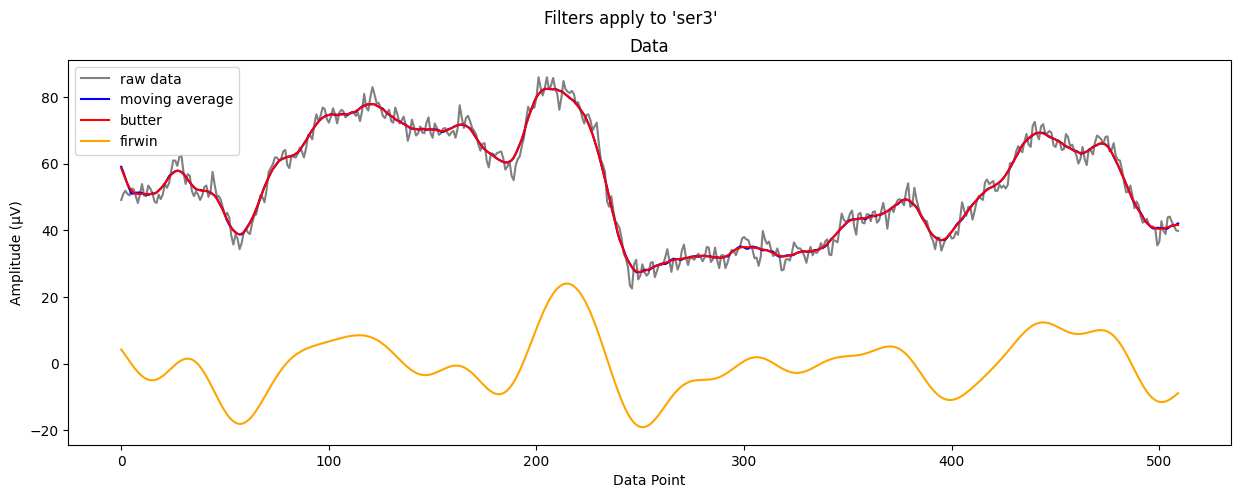

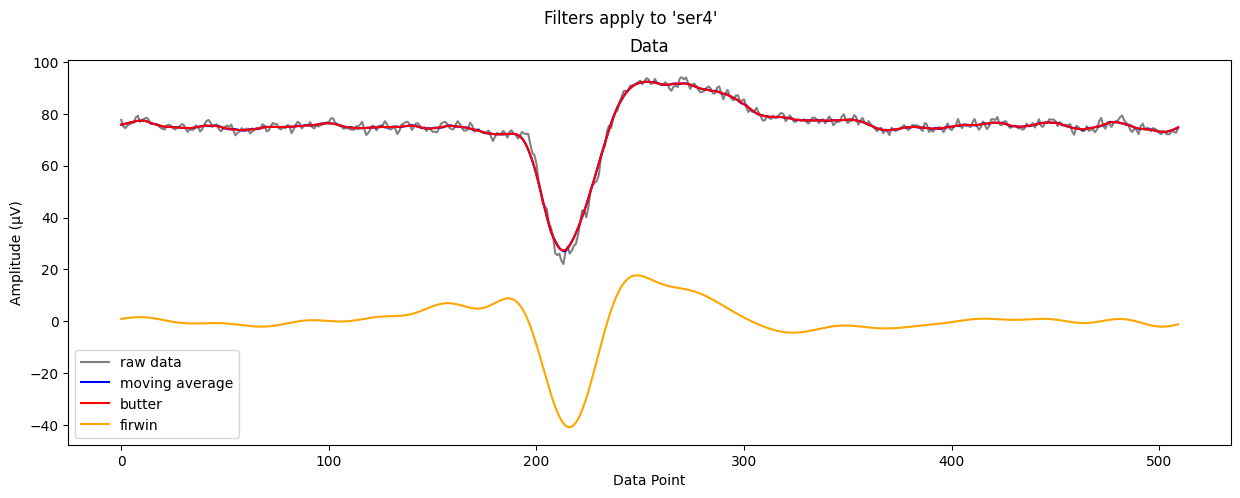

In [13]:
# Get pandas dataframe from raw format
sb_data = raw_sb.to_data_frame()
#print(lb_data)
sb_data = sb_data.drop("time", axis=1) #drop "time" column

# Get pandas series to use in data preprocessing
ser1 = sb_data["ser1"]
ser2 = sb_data["ser2"]
ser3 = sb_data["ser3"]
ser4 = sb_data["ser4"]
#print(type(ser1))
sb_data
sb_filtered = preprocessing(sb_data, SLICE_FROM, SLICE_TO)

**2. Feature Extraction**

2.1 Binarization

The dataset, comprising 25,500 rows, is segmented into batches, with each batch corresponding to a blink epoch of 2 seconds. Each epoch consists of 510 rows, resulting in a total of 50 blinks (including both long and short blinks). This segmentation leads to 50 chunks, each containing 510 data points. Subsequently, a new column is added to classify the filtered dataset into two classes, denoted as 0 and 1. To facilitate time series processing, a function is created to split the data into 100 batches, each containing 4 rows of 510. The batched data are then transposed, treating each array as a unit model for processing.

2.2 Statistical Extraction of Features

Subsequently, statistical feature extraction is employed to identify important signal attributes such as amplitude variation. These features offer valuable insights into the signal and contribute to the system's accuracy. While these statistical features provide valuable information, studies suggest that relying solely on them may not yield a comprehensive diagnosis as they may fall short in capturing the full complexity of brain signals. The statistical features used are:

1) Variance

Variance provides information about the spread or dispersion of amplitude values in the signal. Specifically, variance quantifies how much individual data points in the signal deviate from the mean (average) value. A higher variance indicates greater variability in the amplitude values, while a lower variance suggests that the values are more tightly clustered around the mean. 

3) Energy

Energy is calculated to find the spreading out of the data values around the mean.Energy provides information about the intensity or power of the signal. Peaks in energy may correspond to periods of increased neural activity or certain events captured by the EEG. It can be calculated by using Eq. below:

![Energy.png](image/Energy.png)

4) Standard Deviation

Standard deviation measures the amount of variability or dispersion of the EEG signal values around the mean.A higher standard deviation suggests greater variability in signal amplitudes. It can be indicative of the signal's overall volatility or the presence of irregularities. It can be calculated by using Eq. below:

![std.png](image/std.png)

5) Kurtosis

In a probability distribution, it measures the outliers present. It can be calculated by using Eq. below:

![Kurtosis.png](image/Kurtosis.png)

6) Skewness

Skewness describes asymmetry from the normal distribution in a set of statistical data, as data becomes more symmetrical as its value approaches zero. Normally distributed data, by definition has little skewness and on other hand positively skewed or right sided skewed data has positive and negatively skewed or left sided skewed has negative value. It can be calculated by using Eq. below:

![Skewness.png](image/Skewness.png)


| Statistical features      | Long blink  | Short blink |
| -----------               | ----------- |-----------  |
| Mean                      | 0.019291    |  0.02110    |
| Variance                  |1.844759e+01 |4.101056e+01 |
| Energy                    |1.881693e+06 |4.183123e+06 |
| Standard Deviation        |4.3          |6.4          |
| Kurtosis                  |3.78         |7.82         |
| Skewness                  |-0.0121      |-0.0226      |

It is observed that the mean and skewness do not show much variation between the two classes. On the other hand, variance, energy, standard deviation, and kurtosis show some good variation between the two classes. Therefore, the parameters *Variance*, *Energy*, *Standard deviation*, and *Kurtosis* are considered for analysis.

**Reference**
- [Selection of Appropriate Statistical Features of EEG Signals for Detection of Parkinson’s Disease](https://ieeexplore.ieee.org/document/9200194/authors#authors)
- [Detection of Epileptic Seizure in EEG Recordings by Spectral Method and Statistical Analysis](https://scialert.net/fulltext/?doi=jas.2013.207.219)

**Source code**
- [EEG Features](https://github.com/vancleys/EEGFeatures/blob/master/TimeDomain/Mean.py)
- [EEG ML Classification](https://github.com/talhaanwarch/youtube-tutorials/blob/main/2.1%20EEG%20ML%20classification.ipynb)
- [Annotation](https://matplotlib.org/2.0.2/users/annotations.html#:~:text=pad%3D0.6%22)

In [14]:
lb_filtered.shape
sb_filtered.shape

(25500, 4)

In [15]:
# number of batch per sequence
25500/510


50.0

In [16]:
# Create a function to split data into batches 
def get_transposed_numpy_batched_array(array: np.array, batch_size: int):
    l = []
    for i in range(batch_size, len(array)+batch_size, batch_size):
        l.append(array[i-batch_size:i].T.to_numpy())
    # print(array[i-batch_size:i].T)
    return np.array(l)

# Create an array of long blink epochs and class labels
long_blink_epochs_array = get_transposed_numpy_batched_array(lb_filtered, 510)
long_blink_labels = len(long_blink_epochs_array)*[1]

# Create an array of short blink epochs and class labels
short_blink_epochs_array = get_transposed_numpy_batched_array(sb_filtered, 510)
short_blink_labels = len(short_blink_epochs_array)*[0]

# Concatenate the long and short blink epochs and class labels to create the final dataset for training
blink_epochs_array = np.concatenate([long_blink_epochs_array, short_blink_epochs_array])
blink_labels = np.concatenate([long_blink_labels, short_blink_labels])


blink_epochs_array.shape, blink_labels.shape

((100, 4, 510), (100,))

In [17]:
blink_epochs_array.shape

(100, 4, 510)

In [18]:
pd.DataFrame(blink_epochs_array[0])

,0,1,2,3,4,5,6,7,8,9,...,500,501,502,503,504,505,506,507,508,509
0,-1.095594,1.734547,4.539968,7.281797,9.922515,12.426768,14.762139,16.899758,18.814881,20.487496,...,0.411046,0.496900,0.578563,0.653479,0.719241,0.773601,0.814460,0.839953,0.848520,0.839137
1,-0.056264,3.229472,6.475748,9.637965,12.673420,15.542214,18.208042,20.638729,22.807021,24.691141,...,2.038416,1.977596,1.899477,1.802948,1.687051,1.551265,1.395575,1.220207,1.025556,0.812521
2,0.513087,3.102987,5.655919,8.135236,10.505876,12.735181,14.793401,16.654437,18.296298,19.701559,...,1.255635,1.109438,0.949625,0.778681,0.599176,0.413797,0.225333,0.036843,-0.148883,-0.329292
3,-0.575128,2.343374,5.226025,8.032320,10.723351,13.262663,15.617052,17.757346,19.658884,21.302042,...,0.239899,0.336664,0.426271,0.506147,0.574093,0.628014,0.666023,0.686581,0.688501,0.671161


In [19]:
# Create a group list for the blink epochs as part of EEG ML classification model 
groups_list = [i for i, _ in enumerate(blink_epochs_array)]

In [20]:
from scipy import stats 

def mean(data, axis=None):
    return np.mean(data, axis=axis)

def var(data, axis=None):
        return np.var(data, axis=axis)
    
def std(data, axis=None):
    return np.std(data, axis=axis)

def energy(data, axis=None):
    return np.sum(np.square(data), axis=axis) 

def kurtosis(data, axis=None):
    return stats.kurtosis(data,axis=axis)

def skewness(data, axis=None):
     return stats.skew(data, axis=axis)

def concatenate_features(data, axis=None):
    return np.concatenate((var(data, axis=axis), std(data, axis=axis), energy(data, axis=axis), kurtosis(data, axis=axis)), axis=axis)


-8.739457e-02
3.039575e+01
3.101146e+06
5.513234e+00
3.244961e+00
-7.588133e-02


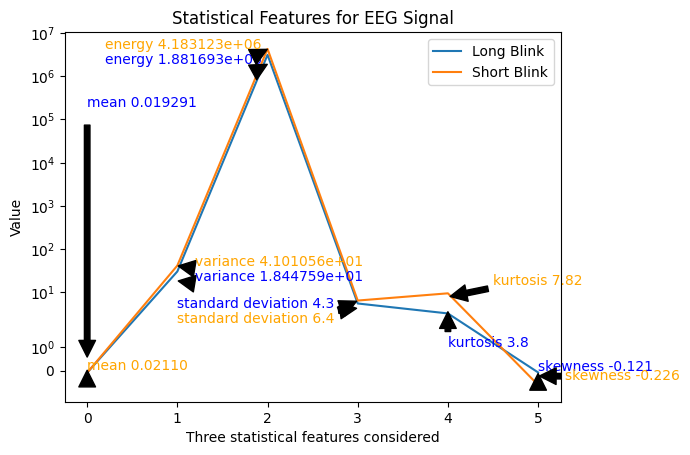

In [21]:
# Calculate statistical features for each column

lb_mean_values = mean(long_blink_epochs_array)
lb_var_values = var(long_blink_epochs_array)
lb_energy_values = energy(long_blink_epochs_array)
lb_std_values = std(long_blink_epochs_array)
lb_kurtosis_values = kurtosis(long_blink_epochs_array)
lb_skew_values = skewness(long_blink_epochs_array)

print("{:e}".format(lb_mean_values))
print("{:e}".format(lb_var_values))
print("{:e}".format(lb_energy_values))
print("{:e}".format(lb_std_values))
print("{:e}".format(lb_kurtosis_values))
print("{:e}".format(lb_skew_values))


sb_mean_values = mean(short_blink_epochs_array)
sb_var_values = var(short_blink_epochs_array)
sb_energy_values = energy(short_blink_epochs_array)
sb_std_values = std(short_blink_epochs_array)
sb_kurtosis_values = kurtosis(short_blink_epochs_array)
sb_skew_values = skewness(short_blink_epochs_array)

# print("{:e}".format(sb_mean_values)) 
# print("{:e}".format(sb_var_values))
# print("{:e}".format(sb_energy_values))
# print("{:e}".format(sb_std_values ))
# print("{:e}".format(sb_kurtosis_values))
# print("{:e}".format(sb_skew_values))


# Create a list of statistical feature names
feature_names = ["Mean", "Variance", "Energy", "Standard Deviation", "Kurtosis", "Skewness"]

# Create a list of statistical feature values for each column
lb_feature_values = [lb_mean_values, lb_var_values, lb_energy_values, lb_std_values, lb_kurtosis_values, lb_skew_values]
sb_feature_values = [sb_mean_values, sb_var_values, sb_energy_values, sb_std_values, sb_kurtosis_values, sb_skew_values]

l = [i for i in range(len(feature_names))]

# Plot each statistical feature for each column

plt.plot(l, lb_feature_values, label="Long Blink" )
plt.plot(l, sb_feature_values, label="Short Blink")  

plt.xlabel("Three statistical features considered")  # Assuming each feature value corresponds to an epoch
plt.ylabel("Value")

# # Plot the selected statistical values for long blink epochs
plt.annotate('mean 0.019291', xy=(0, 0.019291), xytext=(0, 200000.019291), color = "blue", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('variance 1.844759e+01', xy=(1, 1.844759e+01), xytext=(1.2, 1.844759e+01), color = "blue", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('energy 1.881693e+06', xy=(2, 1.881693e+06), xytext=(0.2, 1.881693e+06), color = "blue", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('standard deviation 4.3', xy=(3, 4.3), xytext=(1, 4.3), color = "blue", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('kurtosis 3.8', xy=(4, 3.8), xytext=(4, 1), color = "blue", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('skewness -0.121', xy=(5, -0.121), xytext=(5, -0.0121), color = "blue", arrowprops=dict(facecolor='black', shrink=0.05))


# Plot the selected statistical values for short blink epochs
plt.annotate('mean 0.02110', xy=(0, 0.02110), xytext=(0, 0.02110), color = "orange", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('variance 4.101056e+01', xy=(1, 4.101056e+01), xytext=(1.2, 4.101056e+01), color = "orange", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('energy 4.183123e+06', xy=(2, 4.183123e+06), xytext=(0.2, 4.183123e+06), color = "orange", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('standard deviation 6.4', xy=(3, 6.4), xytext=(1, 2), color = "orange", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('kurtosis 7.82', xy=(4, 7.82), xytext=(4.5, 15), color = "orange", arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('skewness -0.226', xy=(5, -0.226), xytext=(5.3, -0.4), color = "orange", arrowprops=dict(facecolor='black', shrink=0.05))


plt.title(f"Statistical Features for EEG Signal")
plt.yscale("symlog", base=10)
plt.legend()

plt.show()

In [22]:
# 100 rows of 16 features, 4 features for each of the 4 channels
features_list=[]
for data in blink_epochs_array:
    features_list.append(concatenate_features(data, axis=-1))
features=np.array(features_list)
features.shape

(100, 16)

**3. Biomarker Selection and Visualization**

In the context of biomarker selection, the random forest algorithm, which employs multiple decision tree classifiers on various subsets of the dataset is applied. Averaging is used to enhance predictive accuracy and control overfitting.

To determine the optimal number of trees, five-fold cross-validation is applied. Interestingly, all estimators `n_trees in [50, 100, 200, 500]` achieved perfect accuracy on the training data. As a result, the retained features are applied with the smallest number of trees `n_estimators = 50`. 

The selected biomarkers consist of 16 statistical features (4 features for each of the 4 electrodes). These features are extracted from 75% of the datasets, and two classes are considered. The visualized plot illustrates the sequences of statistical features from top to bottom as *Variance*, *Energy*, *Standard deviation*, and *Kurtosis*. Long blinks are annotated with a green dotted line, while short blinks are annotated with a red dotted line. The visual inspection indicates that the majority of long blinks (associated with eye disorder) appear flat, while short blinks (healthy state) display spikes. This distinction is particularly noticeable, especially in the *Kurtosis* feature.

**Reference**
- [Feature Selection with Random Forest](https://www.yourdatateacher.com/2021/10/11/feature-selection-with-random-forest/)
- [Understanding Random Forest Better through Visualization](https://garg-mohit851.medium.com/random-forest-visualization-3f76cdf6456f)

**Reference Code**
- [stackoverflow](https://stackoverflow.com/questions/6146290/plotting-a-line-over-several-graphs)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(features, blink_labels, test_size=0.25, random_state=42, shuffle=True)

for n_trees in [50, 100, 200, 500]:
    # Create RandomForestClassifier with current n_estimators
    forest = RandomForestClassifier(n_estimators=n_trees, random_state=42)
    
    # Use cross_val_score for evaluation
    scores = cross_val_score(forest, X_train, y_train, cv=5)  # 5-fold cross-validation
    mean_score = scores.mean()
    
    print(f"n_estimators={n_trees}, Mean Cross-Validation Score: {mean_score}")

n_estimators=50, Mean Cross-Validation Score: 0.9866666666666667
n_estimators=100, Mean Cross-Validation Score: 0.9866666666666667
n_estimators=200, Mean Cross-Validation Score: 0.9866666666666667
n_estimators=500, Mean Cross-Validation Score: 0.9866666666666667


In [24]:
# Create and train a random forest (code is learned from kaggle on other dataset irrelavant to this project)
forest= RandomForestClassifier(n_estimators= 50, random_state= 42)
forest.fit(X_train, y_train)

# Get the most important features
forest_feats= SelectFromModel(forest, threshold= 'median')
forest_feats.fit(X_train, y_train)

# Get training and development sets that have only the most important features
X_train_forest= forest_feats.transform(X_train)
X_devel_forest= forest_feats.transform(X_test) 

# Features that will be retained
for i in forest_feats.get_support(indices= True):
    print(X_train[i])



[3.17349258e+01 3.29822580e+01 1.60101646e+01 3.12677973e+01
 5.63337605e+00 5.74301820e+00 4.00127037e+00 5.59176156e+00
 1.61994313e+04 1.68361672e+04 8.16689898e+03 1.59573625e+04
 2.12627969e+00 1.67744164e+00 1.67863648e+00 2.05438604e+00]
[2.81071489e+01 2.88585572e+01 1.32728467e+01 2.70447174e+01
 5.30161757e+00 5.37201612e+00 3.64319183e+00 5.20045358e+00
 1.43500195e+04 1.47286290e+04 6.79406752e+03 1.38108960e+04
 1.88347847e+00 2.85020776e+00 2.13372024e+00 1.91163283e+00]
[3.62616226e+01 2.91582085e+01 1.63110539e+01 4.20520762e+01
 6.02176241e+00 5.39983412e+00 4.03869458e+00 6.48475722e+00
 1.85305985e+04 1.48714304e+04 8.33118807e+03 2.14837293e+04
 8.25852944e+00 8.39112458e+00 8.64463081e+00 8.42779676e+00]
[3.75656868e+01 2.29782958e+01 2.72302755e+01 4.29505743e+01
 6.12908531e+00 4.79356817e+00 5.21826365e+00 6.55366876e+00
 1.91730444e+04 1.17290204e+04 1.38962551e+04 2.19213973e+04
 1.01445894e+01 9.17694212e+00 4.09240334e+00 9.88917290e+00]
[4.39942926e+01 3.85

In [25]:
df3 = pd.DataFrame(np.concatenate((X_train, y_train[:, None]), axis=1)) #y_train[:, None] only take the first column
df3.head(5), df3.shape

(          0          1          2          3         4         5         6   \
 0  31.734926  32.982258  16.010165  31.267797  5.633376  5.743018  4.001270   
 1  23.084482  47.127725  10.692235  25.512342  4.804631  6.864964  3.269898   
 2  52.042921  24.823857  57.773023  57.497217  7.214078  4.982355  7.600857   
 3  28.107149  28.858557  13.272847  27.044717  5.301618  5.372016  3.643192   
 4  24.721559  12.267238  19.743765  29.153571  4.972078  3.502462  4.443396   
 
          7             8             9             10            11        12  \
 0  5.591762  16199.431272  16836.167180   8166.898985  15957.362452  2.126280   
 1  5.050974  11774.515187  24054.246132   5463.920795  13013.564332  1.825855   
 2  7.582692  26555.740944  12670.333805  29479.036798  29338.412586  9.139452   
 3  5.200454  14350.019466  14728.629032   6794.067518  13810.896040  1.883478   
 4  5.399405  12618.661643   6256.934482  10112.111796  14873.917142  9.162149   
 
          13        14  

Text(0, 0.5, 'Amplitude of the features')

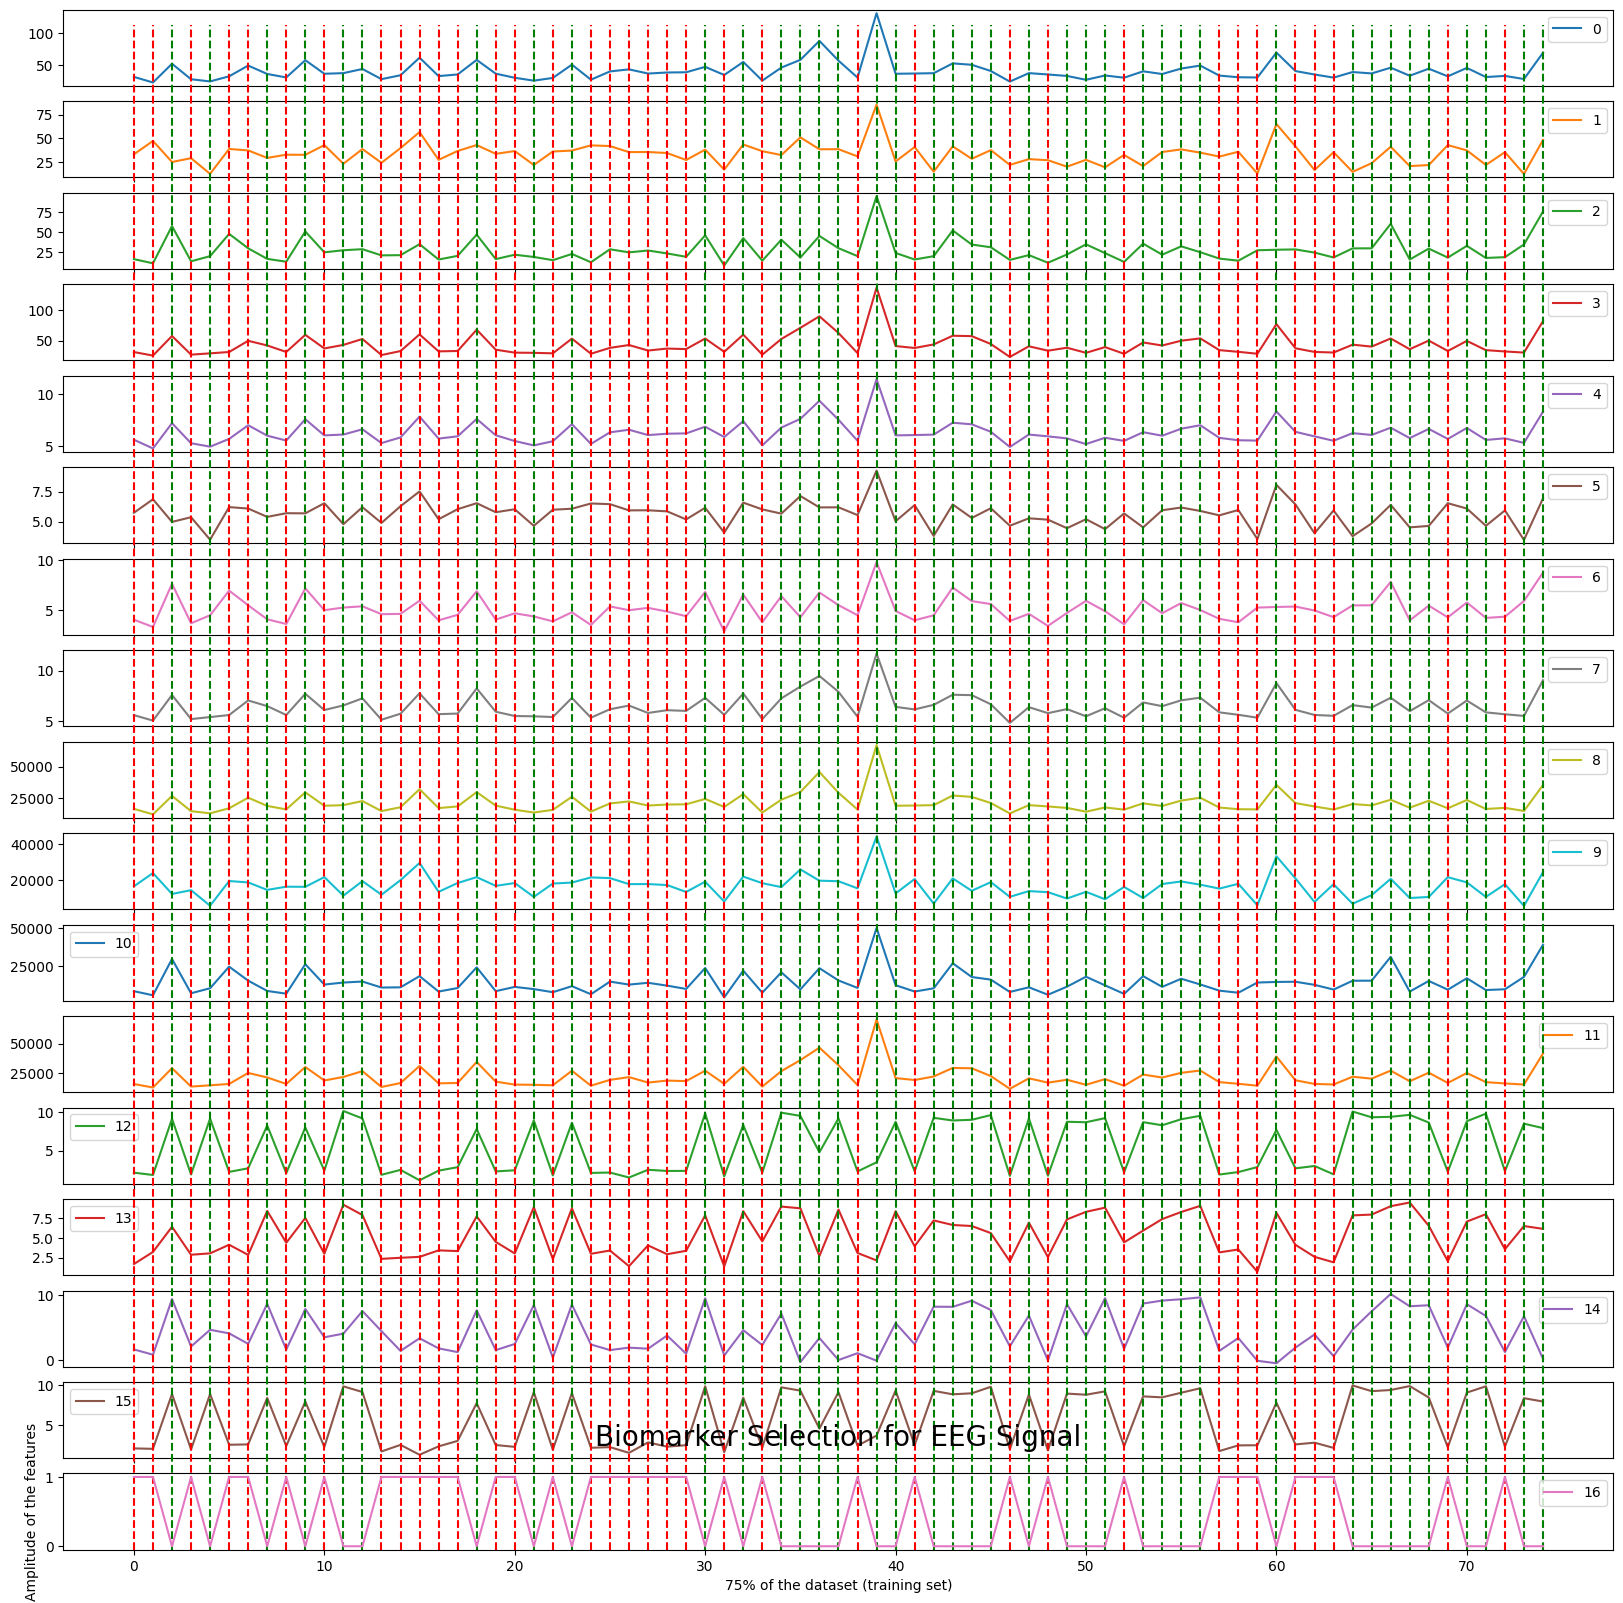

In [26]:
df3.plot.line(subplots=True, figsize=(20, 20))
plt.rcParams['figure.constrained_layout.use'] = True
plt.title('Biomarker Selection for EEG Signal', pad=20, loc='center', fontsize=20)

for i in range(len(df3)):
    if df3.iloc[i,-1:].values == 1:
        # if 1 == long blink and print red line
        plt.axvline(x=i, ymin=0, ymax=20, color='red', linestyle='--',zorder=0, clip_on=False)
    else:
        # if 0 == short blink and print green line
        plt.axvline(x=i, ymin=0, ymax=20, color='green', linestyle='--',zorder=0, clip_on=False)
    # plt.axvline(x=column_series[-1], color='black', linestyle='--')
plt.xlabel('75% of the dataset (training set)')
plt.ylabel('Amplitude of the features')


In [27]:
X_train_forest.shape, y_train.shape

((75, 8), (75,))

**4. Model Development, Validation and Evaluation**

The first model architecture is a simple sequential neural network model for classification using `Keras library`. This model incorporates two `dense layers`, hidden layers with 20 neurons, and output layer with 2 classes **(long blink = 1, short blink = 0)**. The input layer is 8 (selected features). Activation function are specified for both hidden and output layers. Additionally, an optimizer, different batch sizes, and loss function are configured to quantify the difference between predicted binary outcomes and actual binary labels during testing at 40 epochs.To fine-tune the model, three sets of hyperparameters (activation function, loss function, and optimizer) are employed. Following model training, the `classification_report()` function from the `sklearn library` is applied to generate the metrics commonly used to assess the quality of the model. From the report, **Precision**, **Recall**, **F1-Score**  are specifically considered in the evaluation.

Upon analyzing the test dataset, which comprises 11 short blinks and 14 long blinks, set C (characterized by the activation function `Relu` in the hidden layer, `Softmax` in the last layer, `categorical_crossentropy` as loss function, `Adam` as optimizer and `batch size` as 20)  emerges as the optimal choice among the three sets of hyperparameters. It demonstrates a relatively low loss score and excels in test accuracy, precision, recall, and F1-score. 

<p>

The dataset is processed using the classical machine learning model, Support Vector Classifier (SVC), yielding amazing results:

| SVC | Score | 
| ------| ----------|  
|  Classical SVC on the training dataset   | 1.00   |   
|  Classical SVC on the test dataset       | 1.00   | 

</p>

<p>
<h5>Classification report: SVC</h5>

| Class | Precision | Recall | F1-score |  
| ------| ----------|  ------| -------- | 
|  0    | 1.00      | 1.00   | 1.00     |
|  1    | 1.00      | 1.00   | 1.00     |

</p>

When iterating with the same dataset, there is a noticeable decrease in test accuracy. Therefore, to assess the model's efficiency and performance more robustly, it is advisable to evaluate it on a different dataset. 

When iterating with the same dataset, there is a noticeable decrease in test accuracy. Therefore, to assess the model's efficiency and performance more robustly, it is advisable to evaluate it on a different dataset. 

**Reference**
- [InterpretationHow to Interpret the Classification Report in sklearn (With Example)](https://www.statology.org/sklearn-classification-report/)

**Reference Code**
- [Applying Machine Learning Methods](https://github.com/aath0/AlgorithmsNeuroscience/blob/master/Tutorials/ApplyingMachineLearningMethods_1.ipynb)
- [The Sequential Model](https://keras.io/guides/sequential_model/)

In [28]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(X_train_forest, y_train) 

train_score_c4 = svc.score(X_train_forest, y_train)
test_score_c4 = svc.score(X_devel_forest, y_test)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.81
Classical SVC on the test dataset:     0.80


In [29]:
from sklearn.metrics import classification_report
y_pred = svc.predict(X_devel_forest)
classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        11
           1       0.85      0.79      0.81        14

    accuracy                           0.80        25
   macro avg       0.80      0.80      0.80        25
weighted avg       0.80      0.80      0.80        25



**5. Challenges and conclusion**

Grasping the intricacies of EEG signals, encompassing both conceptual understanding and the practical application of mathematical concepts in programming, is a challenging and time-consuming endeavor, especially for those without specific training and adequate guidance from subject matter experts. In many scholarly works, eye blinks are commonly treated as artifacts during EEG signal processing. However, there is lack of literature regarding how to leverage eye blinks as potential biomarkers for visual disorders.

In conclusion, this project aimed to develop a digital biomarker using EEG data for the accurate identification of individuals with eye disorders characterized by distinct blink patterns. The initial phase involved comprehensive data preprocessing, including data cleaning, formatting, scaling, and artifact detection. To standardize the magnitude of EEG signal variations, min-max scaling was applied, ensuring a consistent range between 20 and 100 μV across the four electrodes. Subsequent artifact detection, low-frequency drift correction, and filtering steps, including third-order filters and a finite impulse response (FIR) filter, were implemented to enhance data quality and interpretability.

Feature extraction focused on statistical measures such as mean, variance, energy, standard deviation, kurtosis, and skewness. Random Forest, a robust algorithm for biomarker selection, was employed to identify important features. Visualization of the selected biomarkers revealed distinctive patterns between long and short blinks, particularly in the Kurtosis feature.

The model development phase utilized both a neural network and a classical machine learning approach, Support Vector Classifier (SVC). Evaluation metrics such as precision, recall, and F1-score were employed to assess model performance. Notably, set C of the neural network hyperparameters demonstrated optimal results. It is noteworthy that the Support Vector Classifier has also demonstrated superior performance. However, it is essential to note a decrease in test accuracy upon iteration with the same dataset, suggesting potential limitations or overfitting. To ensure robust evaluation, further testing on different datasets is recommended.

This project provides a comprehensive framework for leveraging EEG data as a potential biomarker for eye disorders. 